In [13]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import attrgetter
import re

## 1. Informacion del negocio , analisis de cada variable

In [7]:
#carga de datos , desde directorio origen dataset
cash_df = pd.read_csv("./project_dataset/extract-cash-request-data-analyst.csv")
fees_df = pd.read_csv("./project_dataset/extract-fees-data-analyst.csv")
cash = cash_df.copy()
fees = fees_df.copy()

In [8]:
#informacion general de tipos de datos y cantidad de resgistros por columna y identificacion de variables
cash.info()
cash.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [9]:
cash.isnull().sum()
#cash.describe()
#cash[cash["transfer_type"] == "regular"]["status"].value_counts()
#cash["transfer_type"].value_counts()
cash["recovery_status"].value_counts()


recovery_status
completed               2468
pending                  845
pending_direct_debit      16
cancelled                  1
Name: count, dtype: int64

## preprocesamiento : Analisis inicial
Variables relevantes  CASH

como primeros hallazgos encontramos 4 columnas principales, sin valores nulos que son:
numeros de registros totales para cash_df = 23970
numeros de registros totales para fees_df = 21061

cash_df variables : [id , amount ,status , created_at , updated_at , (user_id u deleted_account_id) , transfer type]


In [5]:
fees_df.info()
fees_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


Text(0.5, 1.0, 'fees by type')

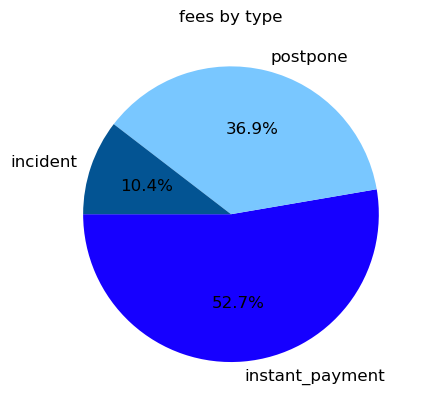

In [10]:
fees.isnull().sum()

counts = fees["type"].value_counts()
plt.figure()
plt.pie(counts,labels=counts.index , autopct='%1.1f%%', startangle=180, colors=['#1600ff', '#79c7ff', '#035493'],
        textprops={'color': 'Black', 'fontsize': 12})
plt.title('fees by type')
#fees.describe()
# transfer_type :Instant = user choose not received the advance instantly . Regular = user choose to not pay and wait for the transfer

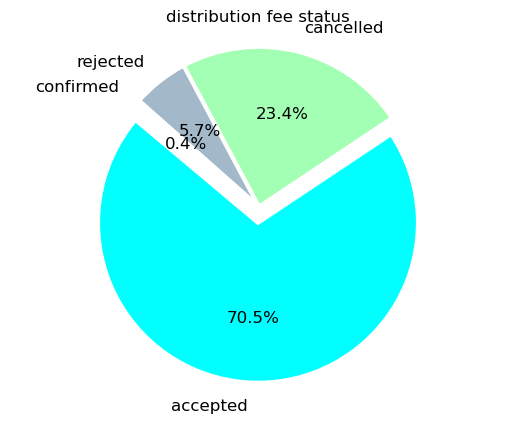

In [7]:
#source: https://python-graph-gallery.com/

count_status_fee = fees['status'].value_counts()
#conteo de clasfificaciones de status fee

count_status_fee = fees['status'].value_counts()
explode = [0.1, 0, 0, 0] #prueba con explode para grafico

# estructura para añadir o quitar colores para graficos, segun numero de opciones agregar mas colores 
custom_colors = ['#00ffff', '#a3ffb4', '#a3b8c8','#ff0000'] # https://color-hex.org/

#estructura para creacion pyplot con 

plt.pie(count_status_fee, labels=count_status_fee.index,labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', startangle=140, colors=custom_colors, explode=[0.1, 0, 0, 0],
        textprops={'color': 'Black', 'fontsize': 12})  # Specify white color and font size
#titulo grafico
plt.title('distribution fee status')

# Easegura que los ejes sean iguales para confirmar circulo 
plt.axis('equal')


plt.show()



In [11]:

test = fees["reason"].str.replace(r'\d+', '', regex=True)  #referecnia para limpieza y adecuacion de clasificaciones de variable, para quedarmos solo  con las categorias y desechar el numero 
test.value_counts()




reason
Instant Payment Cash Request     11099
Postpone Cash Request             7766
rejected direct debit             1599
month delay on payment - /         597
Name: count, dtype: int64


## variable relevantes fees 
fees_df variables : [id, type , status, updated_at ,crated_at,charge_moment, total_amount]
identificando variable created_at y updated_at que son fechas, como referencia para creacion de cohortes.

<Axes: >

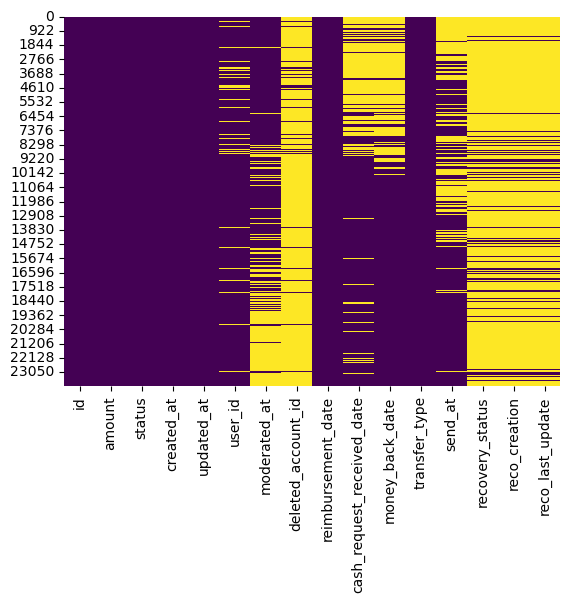

In [9]:
#mapa de calor de valores nulos o faltantes

sns.heatmap(cash_df.isnull(), cbar=False, cmap='viridis')

## Preprocesamiento tipos de datos
en nuestro caso de estudios, encontramos variables mayoritariamente fechas en diferentes  formatos , y otras variables cualitativas politomicas nominales. procederemos antes de la limpieza de datos a dar formatos adecuados para el procesamiento.

In [10]:
cash_df["created_at"]

0        2019-12-10 19:05:21.596873+00
1         2019-12-10 19:50:12.34778+00
2         2019-12-10 19:13:35.82546+00
3        2019-12-10 19:16:10.880172+00
4        2020-05-06 09:59:38.877376+00
                     ...              
23965    2020-10-12 13:54:11.686225+00
23966     2020-10-27 14:41:25.73491+00
23967    2020-10-20 07:58:04.006937+00
23968    2020-10-10 05:40:55.700422+00
23969    2020-10-08 14:16:52.155661+00
Name: created_at, Length: 23970, dtype: object

In [11]:
#tomaremos un un indice para entender la configuracion de fechas 
cash_df.iloc[14400]

id                                                    12413
amount                                                100.0
status                                           money_back
created_at                    2020-08-14 00:46:13.010822+00
updated_at                    2020-12-18 13:10:09.557056+00
user_id                                             11318.0
moderated_at                  2020-08-14 08:02:51.869495+00
deleted_account_id                                      NaN
reimbursement_date                   2020-09-07 22:00:00+00
cash_request_received_date                       2020-08-14
money_back_date               2020-09-09 19:51:33.705958+00
transfer_type                                       instant
send_at                       2020-08-21 00:46:12.957617+00
recovery_status                                         NaN
reco_creation                                           NaN
reco_last_update                                        NaN
Name: 14400, dtype: object

In [12]:
fees_df.iloc[14400]

id                                              17930
cash_request_id                               24724.0
type                                  instant_payment
status                                       accepted
category                                          NaN
total_amount                                      5.0
reason             Instant Payment Cash Request 24724
created_at              2020-10-26 16:47:44.417815+00
updated_at              2020-10-26 16:47:44.417847+00
paid_at                 2020-11-09 19:28:05.545693+00
from_date                                         NaN
to_date                                           NaN
charge_moment                                   after
Name: 14400, dtype: object

encontrmos strings relacionados con fechas, se procede a identificar formatos y adecuarlos a un formato comun conveniente para el analisis.
previo a esto crearemos copia de los archivos cargados, para no modificar los originales a los cuales llamaremos , cash y fees [creados en linea 1 de codigo la copia de los datos].

In [13]:
fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]] = \
fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]].apply(pd.to_datetime, format="ISO8601")
cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date","money_back_date", "send_at"]] = \
    cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date", "money_back_date", "send_at"]].apply(pd.to_datetime, format="ISO8601")

## Definicion y creación de cohorte

se define cohorte como numero de usuarios por fecha de primera operacion

In [38]:
#cash["created_at"].dt.to_period('M').value_counts() 
#transformamos la fecha a mes y año para creacion de cohortes
# el metodo transform("min") selecciona la fecha minima y retorna una serie con la misma longitud del dataframe
cash['transaction_month'] = cash['created_at'].dt.to_period('M')
# Calcular el mes de la primera transacción para cada usuario (cohorte)
cash['cohort'] = cash.groupby('user_id')['transaction_month'].transform('min')



/var/folders/7c/3smlgk813_l8xy5r_2zy0trr0000gn/T/ipykernel_38454/3111149072.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['transaction_month'] = cash['created_at'].dt.to_period('M')


In [39]:
# Calcular el índice de cohorte como la diferencia en meses
cash['cohort_index'] = (cash['transaction_month'].dt.year - cash['cohort'].dt.year) * 12 + (cash['transaction_month'].dt.month - cash['cohort'].dt.month)
# Verificar los resultados
print(cash[['user_id', 'transaction_month', 'cohort', 'cohort_index']].head())



   user_id transaction_month   cohort  cohort_index
0    804.0           2019-12  2019-12             0
1    231.0           2019-12  2019-12             0
2    191.0           2019-12  2019-12             0
3    761.0           2019-12  2019-12             0
4   7686.0           2020-05  2020-05             0


In [18]:
fees.info()
fees["reason"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

reason
rejected direct debit                 1599
month delay on payment - 9/2020        283
month delay on payment - 8/2020        203
month delay on payment - 10/2020       102
Postpone Cash Request 12225             34
                                      ... 
Instant Payment Cash Request 21481       1
Instant Payment Cash Request 21140       1
Instant Payment Cash Request 25010       1
Postpone Cash Request 16749              1
Instant Payment Cash Request 20982       1
Name: count, Length: 15149, dtype: int64

In [12]:
print(fees['reason'].value_counts().head(10))

reason
rejected direct debit               1599
month delay on payment - 9/2020      283
month delay on payment - 8/2020      203
month delay on payment - 10/2020     102
Postpone Cash Request 12225           34
Postpone Cash Request 5006            25
Postpone Cash Request 4410            23
Postpone Cash Request 12452           20
Postpone Cash Request 11376           20
Postpone Cash Request 2358            18
Name: count, dtype: int64


In [14]:
#  función para limpiar la columna 'reason'
def clean_reason(reason):
    # Eliminar cualquier número seguido de una cadena (cash request id)
    cleaned_reason = re.sub(r'\sCash\sRequest\s\d+', '', reason)
    cleaned_reason = re.sub(r'\s-\s\d{1,2}/\d{4}', '', cleaned_reason)
    return cleaned_reason

# Aplicar la función a la columna 'reason'
fees['cleaned_reason'] = fees['reason'].apply(clean_reason)

# Verificar los resultados
print(fees['cleaned_reason'].value_counts().head(10))

cleaned_reason
Instant Payment           11099
Postpone                   7766
rejected direct debit      1599
month delay on payment      597
Name: count, dtype: int64
